# Natural Language Processing using NLTK and Scikit

In [6]:
import pip
pip.main(["install", "openpyxl"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting openpyxl

Downloading openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)

Output()

Collecting et-xmlfile (from openpyxl)

Downloading et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)

Installing collected packages: et-xmlfile, openpyxl

Successfully installed et-xmlfile-1.1.0 openpyxl-3.1.2

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\nasru\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

0

In [17]:
!pip install --upgrade pip

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\nasru\anaconda3\envs\NLP\python.exe -m pip install --upgrade pip


# 1. Importing Data and Converting XLSX to CSV

In [20]:
import pandas as pd

# Assuming you're running this in an environment where 'openpyxl' is installed
# Load the dataset from an Excel file
file_path = 'combined_text_labelled.xlsx'
data = pd.read_excel(file_path)

# Convert the loaded DataFrame to a CSV file in the current working directory
csv_file_path = 'combined_text_labelled.csv'  # Save in the current directory
data.to_csv(csv_file_path, index=False)

# Print the path to the newly created CSV file
print(csv_file_path)

combined_text_labelled.csv


# 2. Reading data

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'combined_text_labelled.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

In [ ]:
# Distribution of the "Sentiment" column
sentiment_distribution = data['Sentiment'].value_counts(normalize=True) * 100

sentiment_distribution

# 3. Data Cleaning

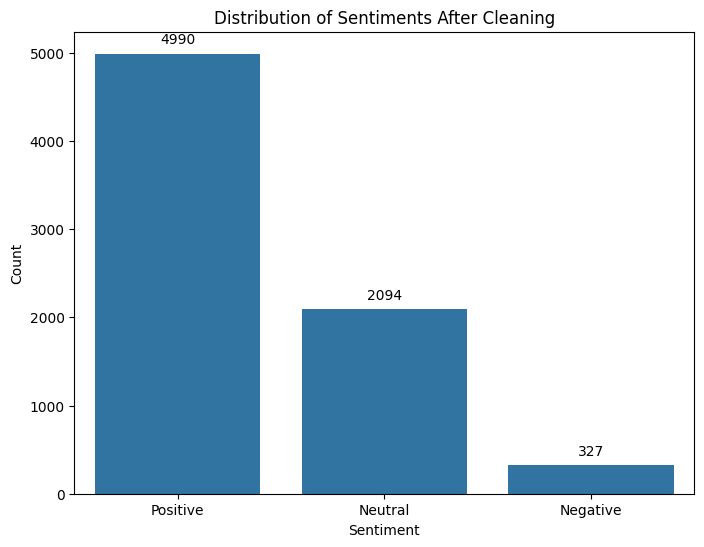

In [12]:
# Data Cleaning
# Correcting the sentiment labels
data['Sentiment'] = data['Sentiment'].str.strip()

# Removing rows with empty values in 'Text' and 'Sentiment' columns
data_cleaned = data.dropna(subset=['Text', 'Sentiment'])

# Checking for any remaining empty strings in 'Text'
data_cleaned = data_cleaned[data_cleaned['Text'].str.strip() != '']

# Now, let's visualize the corrected distribution of sentiments using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sentiment', data=data_cleaned)
plt.title('Distribution of Sentiments After Cleaning')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Adding the count above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


# 4. Data Preprocessing

## 1. Download NLTK stop words

In [30]:
pip.main(["install", "nltk"])
pip.main(["install", "wordcloud"])
pip.main(["install", "scikit-learn"])

import nltk
nltk.download('stopwords')
nltk.download('punkt')

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: nltk in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (3.8.1)

Requirement already satisfied: click in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from nltk) (8.1.7)

Requirement already satisfied: joblib in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from nltk) (1.3.2)

Requirement already satisfied: regex>=2021.8.3 in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from nltk) (2023.12.25)

Requirement already satisfied: tqdm in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from nltk) (4.66.1)

Requirement already satisfied: colorama in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from click->nltk) (0.4.6)

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\nasru\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: wordcloud in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (1.9.3)

Requirement already satisfied: numpy>=1.6.1 in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from wordcloud) (1.25.2)

Requirement already satisfied: pillow in c:\users\nasru\appdata\roaming\python\python311\site-packages (from wordcloud) (9.4.0)

Requirement already satisfied: matplotlib in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from wordcloud) (3.6.0)

Requirement already satisfied: contourpy>=1.0.1 in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from matplotlib->wordcloud) (1.1.1)

Requirement already satisfied: cycler>=0.10 in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from matplotlib->wordcloud) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from matplotlib->wordcloud) (4.43.1)

Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from matplotlib->wordcloud) (1.4.5)

Requirement already satisfied: packaging>=20.0 in c:\users\nasru\appdata\roaming\python\python311\site-packages (from matplotlib->wordcloud) (23.0)

Requirement already satisfied: pyparsing>=2.2.1 in c:\users\nasru\appdata\roaming\python\python311\site-packages (from matplotlib->wordcloud) (3.0.9)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from matplotlib->wordcloud) (2.8.2)

Requirement already satisfied: six>=1.5 in c:\users\nasru\appdata\roaming\python\python311\site-packages (from python-dateutil>=2.7->matplotlib->wordcloud) (1.16.0)

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\nasru\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: scikit-learn in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (1.2.2)

Requirement already satisfied: numpy>=1.17.3 in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from scikit-learn) (1.25.2)

Requirement already satisfied: scipy>=1.3.2 in c:\users\nasru\appdata\roaming\python\python311\site-packages (from scikit-learn) (1.10.1)

Requirement already satisfied: joblib>=1.1.1 in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from scikit-learn) (1.3.2)

Requirement already satisfied: threadpoolctl>=2.0.0 in c:\users\nasru\appdata\local\programs\python\python311\lib\site-packages (from scikit-learn) (3.2.0)

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\nasru\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nasru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nasru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2. Import ncessary libraries

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## 3. Prepare text for word cloud

In [14]:
positive_text = " ".join(data_cleaned.loc[data_cleaned['Sentiment'] == 'Positive', 'Text'])
neutral_text = " ".join(data_cleaned.loc[data_cleaned['Sentiment'] == 'Neutral', 'Text'])
negative_text = " ".join(data_cleaned.loc[data_cleaned['Sentiment'] == 'Negative', 'Text'])

## 4. Function to Tokenize and Remove Stopwords


In [15]:
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = " ".join([word for word in word_tokens if word.lower() not in stop_words and word.isalpha()])
    return filtered_text

## 5. Apply Cleaning Function to Each Sentiment Category

In [16]:
positive_cleaned = clean_text(positive_text)
neutral_cleaned = clean_text(neutral_text)
negative_cleaned = clean_text(negative_text)

## 6. Generate and Display Word Clouds


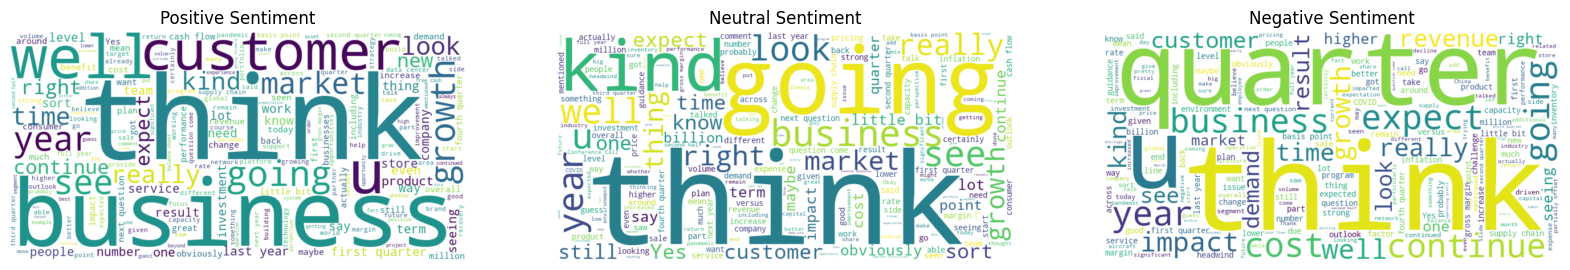

In [17]:
# Generating word clouds
wordcloud_pos = WordCloud(width = 800, height = 400, background_color ='white').generate(positive_cleaned)
wordcloud_neu = WordCloud(width = 800, height = 400, background_color ='white').generate(neutral_cleaned)
wordcloud_neg = WordCloud(width = 800, height = 400, background_color ='white').generate(negative_cleaned)

# Displaying the word clouds for each sentiment
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.show()


# 5. Display First Row Text Before and After Tokenization:


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Clean the first row's text
cleaned_text = clean_text(data_cleaned['Text'].iloc[0])

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text using TF-IDF
# Note: We need to pass a list even if it's just one document
tfidf_result = tfidf_vectorizer.fit_transform([cleaned_text])

# Display the original and cleaned text
print("Original Text:\n", data_cleaned['Text'].iloc[0])
print("\nCleaned Text:\n", cleaned_text)

# Display the TF-IDF vectorized form
# Convert the sparse matrix to a dense array and display the TF-IDF values
print("\nTF-IDF Vectorized Form (first few values):")
print(tfidf_result.toarray()[0][:10])  # Displaying only the first 10 values for brevity

# Also, to give more context, let's display some of the feature names (words) corresponding to these TF-IDF values
print("\nCorresponding Feature Names (words) for the first few TF-IDF values:")
print(tfidf_vectorizer.get_feature_names_out()[:10])  # Displaying only the first 10 feature names for brevity


Original Text:
 Good morning, and thank you for standing by Welcome to Abbott's First Quarter 2022 Earnings Conference Call [Operator Instructions] This call is being recorded by Abbott With the exception of any participant's questions asked during the question-and-answer session, the entire call, including the question-and-answer session, is material copyrighted by Abbott It cannot be recorded or rebroadcast without Abbot's expressed written permission  
I would now like to introduce Mr Scott Leinenweber, Vice President, Investor Relations, Licensing and Acquisitions Good morning, and thank you for joining us With me today are Robert Ford, Chairman and Chief Executive Officer; and Bob Funck, Executive Vice President, Finance and Chief Financial Officer Robert and Bob will provide opening remarks Following their comments, we will take your questions
Before we get started, some statements made today may be forward-looking for purposes of the Private Securities Litigation Reform Act of 1

# 6. Model Building (Ensemble Learning)

## 1. Feature Extraction

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Clean the dataset's text and prepare for TF-IDF
X_cleaned = data_cleaned['Text'].apply(clean_text)
y = data_cleaned['Sentiment']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X_cleaned)


## Step 2 & 3: Model Training and Evaluation (5mins-10mins)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

# Dictionary to hold model names and their scores
model_scores = {}

# Evaluate each model using cross-validation and store the scores
for model_name, model in models.items():
    scores = cross_val_score(model, X_tfidf, y, cv=5, scoring='accuracy')
    model_scores[model_name] = scores

# Convert the scores to a DataFrame for easy comparison
import pandas as pd

In [23]:
df_scores = pd.DataFrame(model_scores).melt(var_name='Model', value_name='Accuracy')
comparison_df = df_scores.groupby('Model')['Accuracy'].agg(['mean', 'std']).reset_index()

## Step 4. Model Comparison

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize a list to store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score']
    })

results_df = pd.DataFrame(results)

model_scores = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_tfidf, y, cv=5, scoring='accuracy')
    model_scores[model_name] = scores

df_scores = pd.DataFrame(model_scores).melt(var_name='Model', value_name='Accuracy')
comparison_df = df_scores.groupby('Model')['Accuracy'].agg(['mean', 'std']).reset_index()

for result in results:
    row_index = comparison_df.index[comparison_df['Model'] == result['Model']].tolist()[0]
    comparison_df.at[row_index, 'Single Split Accuracy'] = result['Accuracy']
    comparison_df.at[row_index, 'Precision'] = result['Precision']
    comparison_df.at[row_index, 'Recall'] = result['Recall']
    comparison_df.at[row_index, 'F1-Score'] = result['F1-Score']

In [29]:
comparison_df_sorted = comparison_df.sort_values(by='Single Split Accuracy', ascending=False).reset_index(drop=True)
comparison_df_sorted

,Model,mean,std,Single Split Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.712588,0.013057,0.720836,0.610223,0.443703,0.444760
1,Gradient Boosting,0.691675,0.008638,0.697910,0.524253,0.410083,0.411446
2,Random Forest,0.695586,0.010364,0.684423,0.428244,0.370604,0.348203


## Classification Report

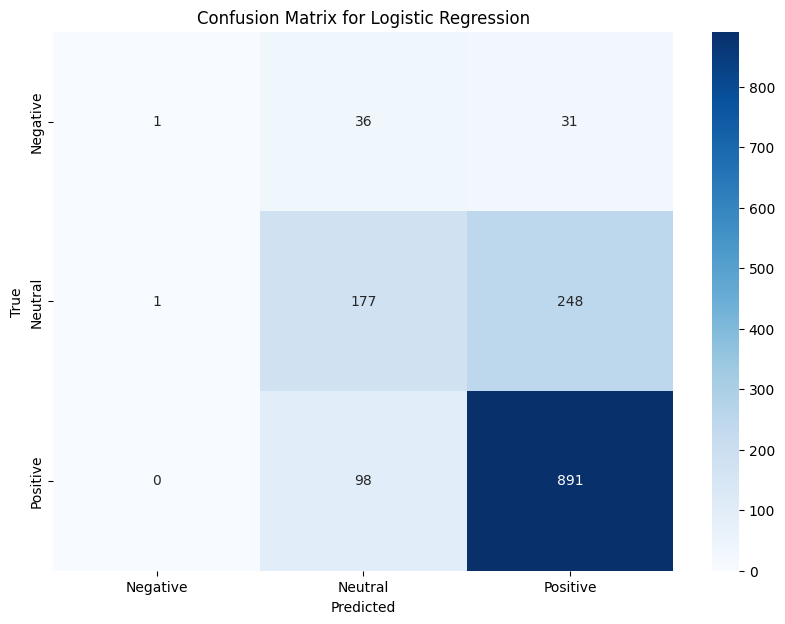

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.50      0.01      0.03        68
     Neutral       0.57      0.42      0.48       426
    Positive       0.76      0.90      0.83       989

    accuracy                           0.72      1483
   macro avg       0.61      0.44      0.44      1483
weighted avg       0.69      0.72      0.69      1483




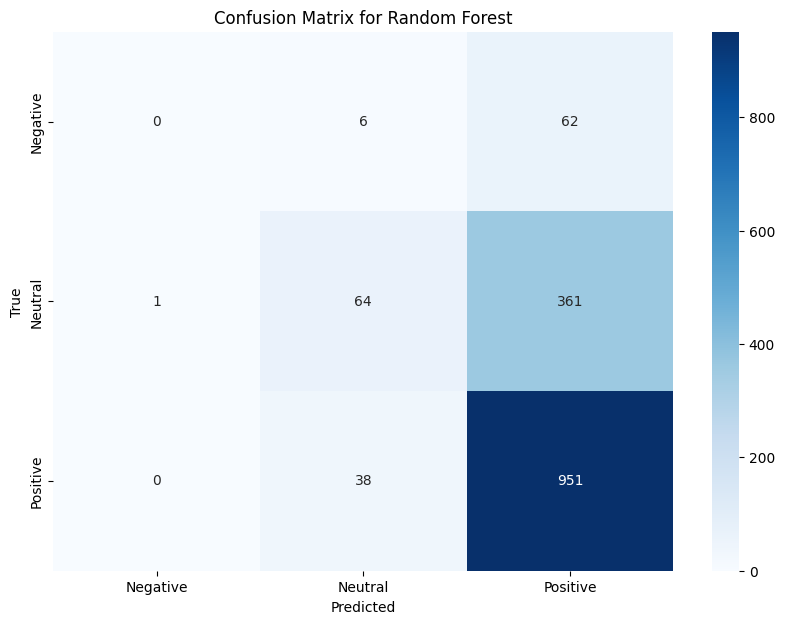

Classification Report for Random Forest:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        68
     Neutral       0.59      0.15      0.24       426
    Positive       0.69      0.96      0.80       989

    accuracy                           0.68      1483
   macro avg       0.43      0.37      0.35      1483
weighted avg       0.63      0.68      0.61      1483




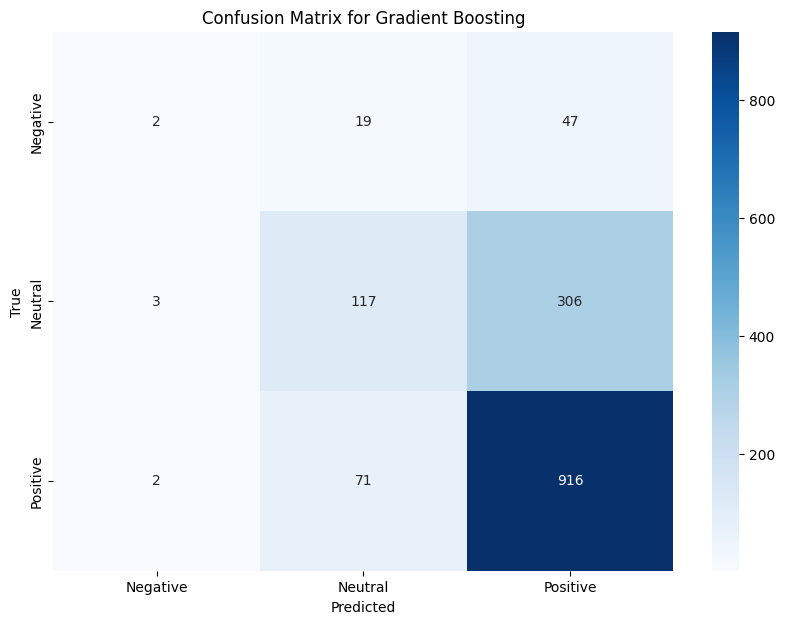

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

    Negative       0.29      0.03      0.05        68
     Neutral       0.57      0.27      0.37       426
    Positive       0.72      0.93      0.81       989

    accuracy                           0.70      1483
   macro avg       0.52      0.41      0.41      1483
weighted avg       0.66      0.70      0.65      1483




In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for model_name, model in models.items():
    # Assuming model has been fitted as per your previous code and predictions have been made
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Classification Report
    report = classification_report(y_test, y_pred, zero_division=0)
    print(f'Classification Report for {model_name}:\n{report}\n')


## ROC and AUC Curve

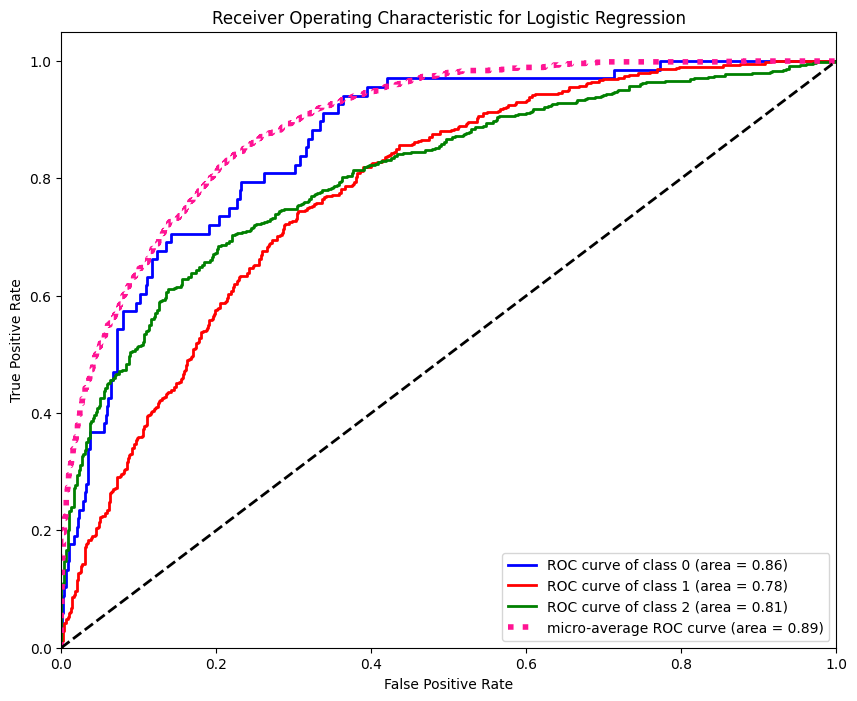

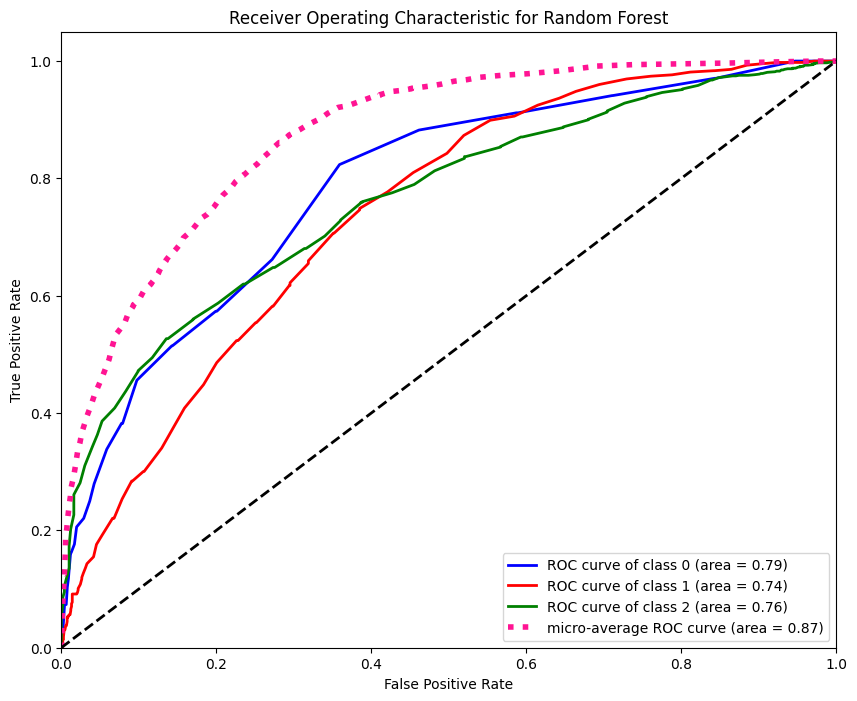

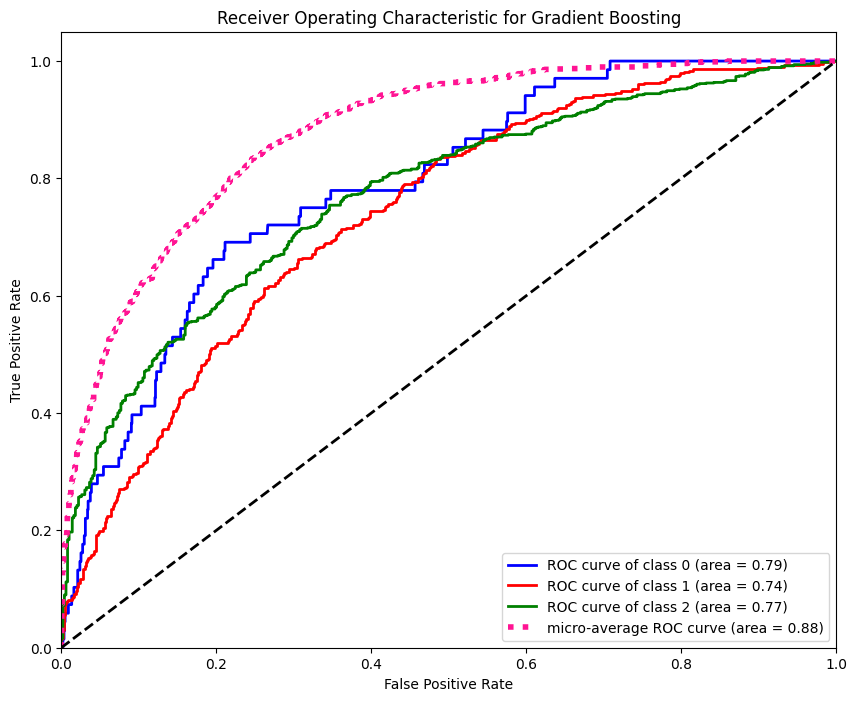

In [31]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc
from itertools import cycle

# Binarize the labels for multiclass
y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Splitting the data with the binarized labels
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X_tfidf, y_binarized, test_size=0.2, random_state=42)

for model_name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_proba = model.predict_proba(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Plot ROC curve for each class and the micro-average
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
    
    plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
             label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()


# 7. Model Prediction

## Step 1: Determine the Best-Performing Model


In [32]:
best_model_name = comparison_df_sorted.iloc[0]['Model']

## Step 2: Save the Best-Performing Model

In [33]:
import pickle

# Example: Assuming the best model is the Gradient Boosting Classifier
best_model = models[best_model_name]

# Retrain on the entire dataset if necessary
best_model.fit(X_tfidf, y)

# Save the model to a pickle file
model_filename = 'best_model.pkl'
pickle.dump(best_model, open(model_filename, 'wb'))

# Save the TF-IDF vectorizer as well
vectorizer_filename = 'tfidf_vectorizer.pkl'
pickle.dump(tfidf_vectorizer, open(vectorizer_filename, 'wb'))

## Step 3: Create a Function for Predictions


In [34]:
def predict_text(text):
    # Load the saved model and vectorizer
    loaded_model = pickle.load(open('best_model.pkl', 'rb'))
    loaded_vectorizer = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))
    
    # Clean and vectorize the text
    cleaned_text = clean_text(text)
    vectorized_text = loaded_vectorizer.transform([cleaned_text])
    
    # Make a prediction
    prediction = loaded_model.predict(vectorized_text)
    
    return prediction

## Step 4: Predict New Inputs


In [35]:
import pickle

user_input = input("Enter your text for sentiment analysis: ")
prediction = predict_text(user_input)
print(f"The predicted sentiment is: {prediction[0]}")

Enter your text for sentiment analysis:  this is a good


The predicted sentiment is: Positive


# Predict Text Function

In [2]:
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure NLTK resources are available
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def clean_text(text):
    """Clean and preprocess text."""
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = " ".join([word for word in word_tokens if word.lower() not in stop_words and word.isalpha()])
    return filtered_text

def predict_text(text, model_filename='best_model.pkl', vectorizer_filename='tfidf_vectorizer.pkl'):
    """Predict sentiment of the given text using the saved model and vectorizer."""
    # Load the saved model and vectorizer
    loaded_model = pickle.load(open(model_filename, 'rb'))
    loaded_vectorizer = pickle.load(open(vectorizer_filename, 'rb'))
    
    # Clean and vectorize the text
    cleaned_text = clean_text(text)
    vectorized_text = loaded_vectorizer.transform([cleaned_text])
    
    # Make a prediction
    prediction = loaded_model.predict(vectorized_text)
    
    return prediction[0]

# Example of using the predict_text function with user input
user_input = input("Enter your text for sentiment analysis: ")
predicted_sentiment = predict_text(user_input)
print(f"The predicted sentiment is: {predicted_sentiment}")


Enter your text for sentiment analysis:  I HATE THIS


The predicted sentiment is: Positive
